# Titanic dataset Notebook

A century has sailed by since the luxury steamship RMS Titanic met its catastrophic end in the North Atlantic, plunging two miles to the ocean floors after sideswiping an iceberg during its maiden voyage.Rather than the intended Port of New York, a deep-sea grave became the pride of the White Star Line’s final destination in the early hours of April 15, 1912.More than 1,500 people lost their lives in the disaster In this project I will be performing an exploratory analysis on the data

### importing libraries

In [81]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

### importing dataset

In [3]:
df=pd.read_csv('titanic_data.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### checking on null values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


name, sex, ticket, cabin and embraked are object type(categorical data) and other are numbers type columns, 

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


the mean Age of passangers were- 29.69
while the mean of Survived is - 0.3838
total numbers are - 891

### trying to handle with null values

<AxesSubplot:>

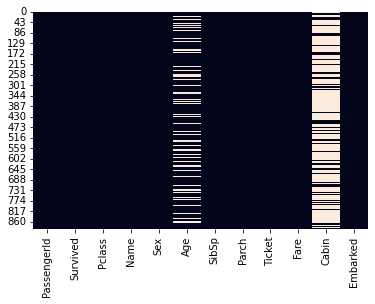

In [9]:
sns.heatmap(df.isnull(),cbar=False)

cabin has more than 50% null values so rather than dealing with inserting values in there we will drop the column itself, and for the age will check the most frequent and mean value and accoring wise will use the same

In [10]:
df.drop(['Cabin'],axis=1,inplace=True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [13]:
int(df['Age'].mean())

29

In [14]:
df=df.fillna(int(df['Age'].mean()))

In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

as of now we have either filled the NAN values with mean age i.e. 29 or else dropped the column with Cabin which has more null values, SO as such NO NULL VALUES IN THE DF

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

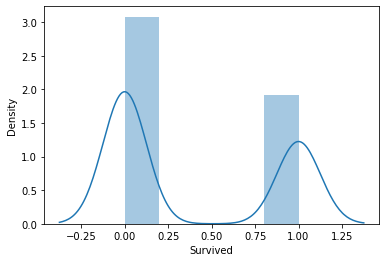

In [16]:
sns.distplot(df.Survived)

density of people who died is more than the people who survived

<AxesSubplot:>

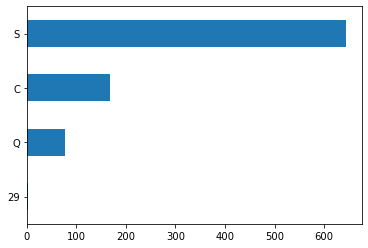

In [17]:
embrak=df['Embarked'].value_counts(ascending=True)
embrak.plot(kind='barh')

In [18]:
embrak.describe()

count      4.000000
mean     222.750000
std      288.919106
min        2.000000
25%       58.250000
50%      122.500000
75%      287.000000
max      644.000000
Name: Embarked, dtype: float64

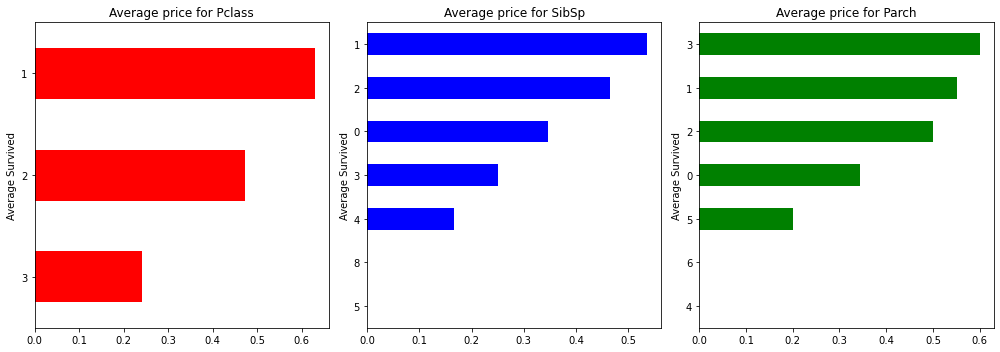

In [19]:
fig,axes=plt.subplots(nrows=1,ncols=3, figsize=(14,5))


fn =['Pclass','SibSp','Parch']
colours = ['red','blue','green']
     
for idx,feature_name,c in zip(range(3),fn,colours):
    ax=axes[idx]
    df.groupby(feature_name).Survived.mean().sort_values(ascending=True).plot(kind='barh',color=c,ax=ax)
    ax.set_title(f"Average price for {feature_name}")
    ax.set_ylabel("Average Survived")
    ax.tick_params(axis = 'x')
     
plt.tight_layout()

    observations:
    1. class 1 people survived more than class 2 and class 3 
    2. siblings/spouse having 1 had survived more than other scenarios
    3. in terms of parents and childs (parch) if they are 3 or 1 or 2, are most likely to be survived than 0 and 5

In [20]:
df['Fare'].sort_values().unique()

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
         6.4958,   6.75  ,   6.8583,   6.95  ,   6.975 ,   7.0458,
         7.05  ,   7.0542,   7.125 ,   7.1417,   7.225 ,   7.2292,
         7.25  ,   7.3125,   7.4958,   7.5208,   7.55  ,   7.6292,
         7.65  ,   7.725 ,   7.7292,   7.7333,   7.7375,   7.7417,
         7.75  ,   7.775 ,   7.7875,   7.7958,   7.8   ,   7.8292,
         7.8542,   7.875 ,   7.8792,   7.8875,   7.8958,   7.925 ,
         8.0292,   8.05  ,   8.1125,   8.1375,   8.1583,   8.3   ,
         8.3625,   8.4042,   8.4333,   8.4583,   8.5167,   8.6542,
         8.6625,   8.6833,   8.7125,   8.85  ,   9.    ,   9.2167,
         9.225 ,   9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,
         9.825 ,   9.8375,   9.8417,   9.8458,  10.1708,  10.4625,
        10.5   ,  10.5167,  11.1333,  11.2417,  11.5   ,  12.    ,
        12.275 ,  12.2875,  12.35  ,  12.475 ,  12.525 ,  12.65  ,
        12.875 ,  13.    ,  13.4167,  13.5   ,  13.7917,  13.8

In [21]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

lets split Fare into 3 categories rather than several ones, what will do min=0-13.85 mid=13.85-47 max=47-512 accordigwise will allign if the fare price into said category will move into respective bucket

In [22]:
bins=np.linspace(min(df['Fare']),max(df['Fare']),4)

In [23]:
group_names=['low','medium','high']

In [24]:
df['Farebinned']=pd.cut(df['Fare'],bins,labels=group_names,include_lowest=True)

In [25]:
df['Farebinned'].value_counts()

low       871
medium     17
high        3
Name: Farebinned, dtype: int64

In [26]:
bins

array([  0.    , 170.7764, 341.5528, 512.3292])

In [27]:
bins_hardcoded=[0.0,14.0,47.0,512.0]

In [28]:
df['Farebinned_1']=pd.cut(df['Fare'],bins_hardcoded,labels=group_names,include_lowest=True)

In [29]:
df['Farebinned_1'].value_counts()

low       437
medium    289
high      162
Name: Farebinned_1, dtype: int64

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Farebinned,Farebinned_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,low,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,low,high
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,low,low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,low,high
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,low,low


In [31]:
df.drop(['PassengerId','Name','Ticket','Fare','Farebinned'],axis=1,inplace=True)

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Farebinned_1
0,0,3,male,22.0,1,0,S,low
1,1,1,female,38.0,1,0,C,high
2,1,3,female,26.0,0,0,S,low
3,1,1,female,35.0,1,0,S,high
4,0,3,male,35.0,0,0,S,low


In [33]:
pd.get_dummies(df[['Sex']]).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Farebinned_1
0,0,3,male,22.0,1,0,S,low
1,1,1,female,38.0,1,0,C,high
2,1,3,female,26.0,0,0,S,low
3,1,1,female,35.0,1,0,S,high
4,0,3,male,35.0,0,0,S,low


In [35]:
df = pd.get_dummies(df)

In [36]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_29,Embarked_C,Embarked_Q,Embarked_S,Farebinned_1_low,Farebinned_1_medium,Farebinned_1_high
0,0,3,22.0,1,0,0,1,0,0,0,1,1,0,0
1,1,1,38.0,1,0,1,0,0,1,0,0,0,0,1
2,1,3,26.0,0,0,1,0,0,0,0,1,1,0,0
3,1,1,35.0,1,0,1,0,0,0,0,1,0,0,1
4,0,3,35.0,0,0,0,1,0,0,0,1,1,0,0


In [37]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_29,Embarked_C,Embarked_Q,Embarked_S,Farebinned_1_low,Farebinned_1_medium,Farebinned_1_high
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000
mean,0.383838,2.308642,29.560236,0.523008,0.381594,0.352413,0.647587,0.002245,0.188552,0.086420,0.722783,0.49046,0.324355,0.181818
std,0.486592,0.836071,13.005010,1.102743,0.806057,0.477990,0.477990,0.047351,0.391372,0.281141,0.447876,0.50019,0.468396,0.385911
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [38]:
df.dtypes

Survived                 int64
Pclass                   int64
Age                    float64
SibSp                    int64
Parch                    int64
Sex_female               uint8
Sex_male                 uint8
Embarked_29              uint8
Embarked_C               uint8
Embarked_Q               uint8
Embarked_S               uint8
Farebinned_1_low         uint8
Farebinned_1_medium      uint8
Farebinned_1_high        uint8
dtype: object

    defining X and y
    X = Independent variable
    y = Dependent Variable
    In this condition our X is all the numeric columns in our data
    y is Survived column

In [39]:
X = df[['Pclass','Age','SibSp','Parch','Sex_female','Sex_male','Embarked_29','Embarked_C','Embarked_Q','Embarked_S','Farebinned_1_low','Farebinned_1_medium','Farebinned_1_high']]

In [40]:
X.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_29,Embarked_C,Embarked_Q,Embarked_S,Farebinned_1_low,Farebinned_1_medium,Farebinned_1_high
0,3,22.0,1,0,0,1,0,0,0,1,1,0,0
1,1,38.0,1,0,1,0,0,1,0,0,0,0,1
2,3,26.0,0,0,1,0,0,0,0,1,1,0,0
3,1,35.0,1,0,1,0,0,0,0,1,0,0,1
4,3,35.0,0,0,0,1,0,0,0,1,1,0,0


In [41]:
Y = df['Survived']

In [42]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Splitting data
    note : train_test_split generates random samples every time automatically
    random_state=10 parameter will naot generatr random samples

In [43]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.3,random_state=40)

In [44]:
df.shape

(891, 14)

In [45]:
print(Xtrain.shape,Ytrain.shape)

(623, 13) (623,)


In [46]:
print(Xtest.shape,Ytest.shape)

(268, 13) (268,)


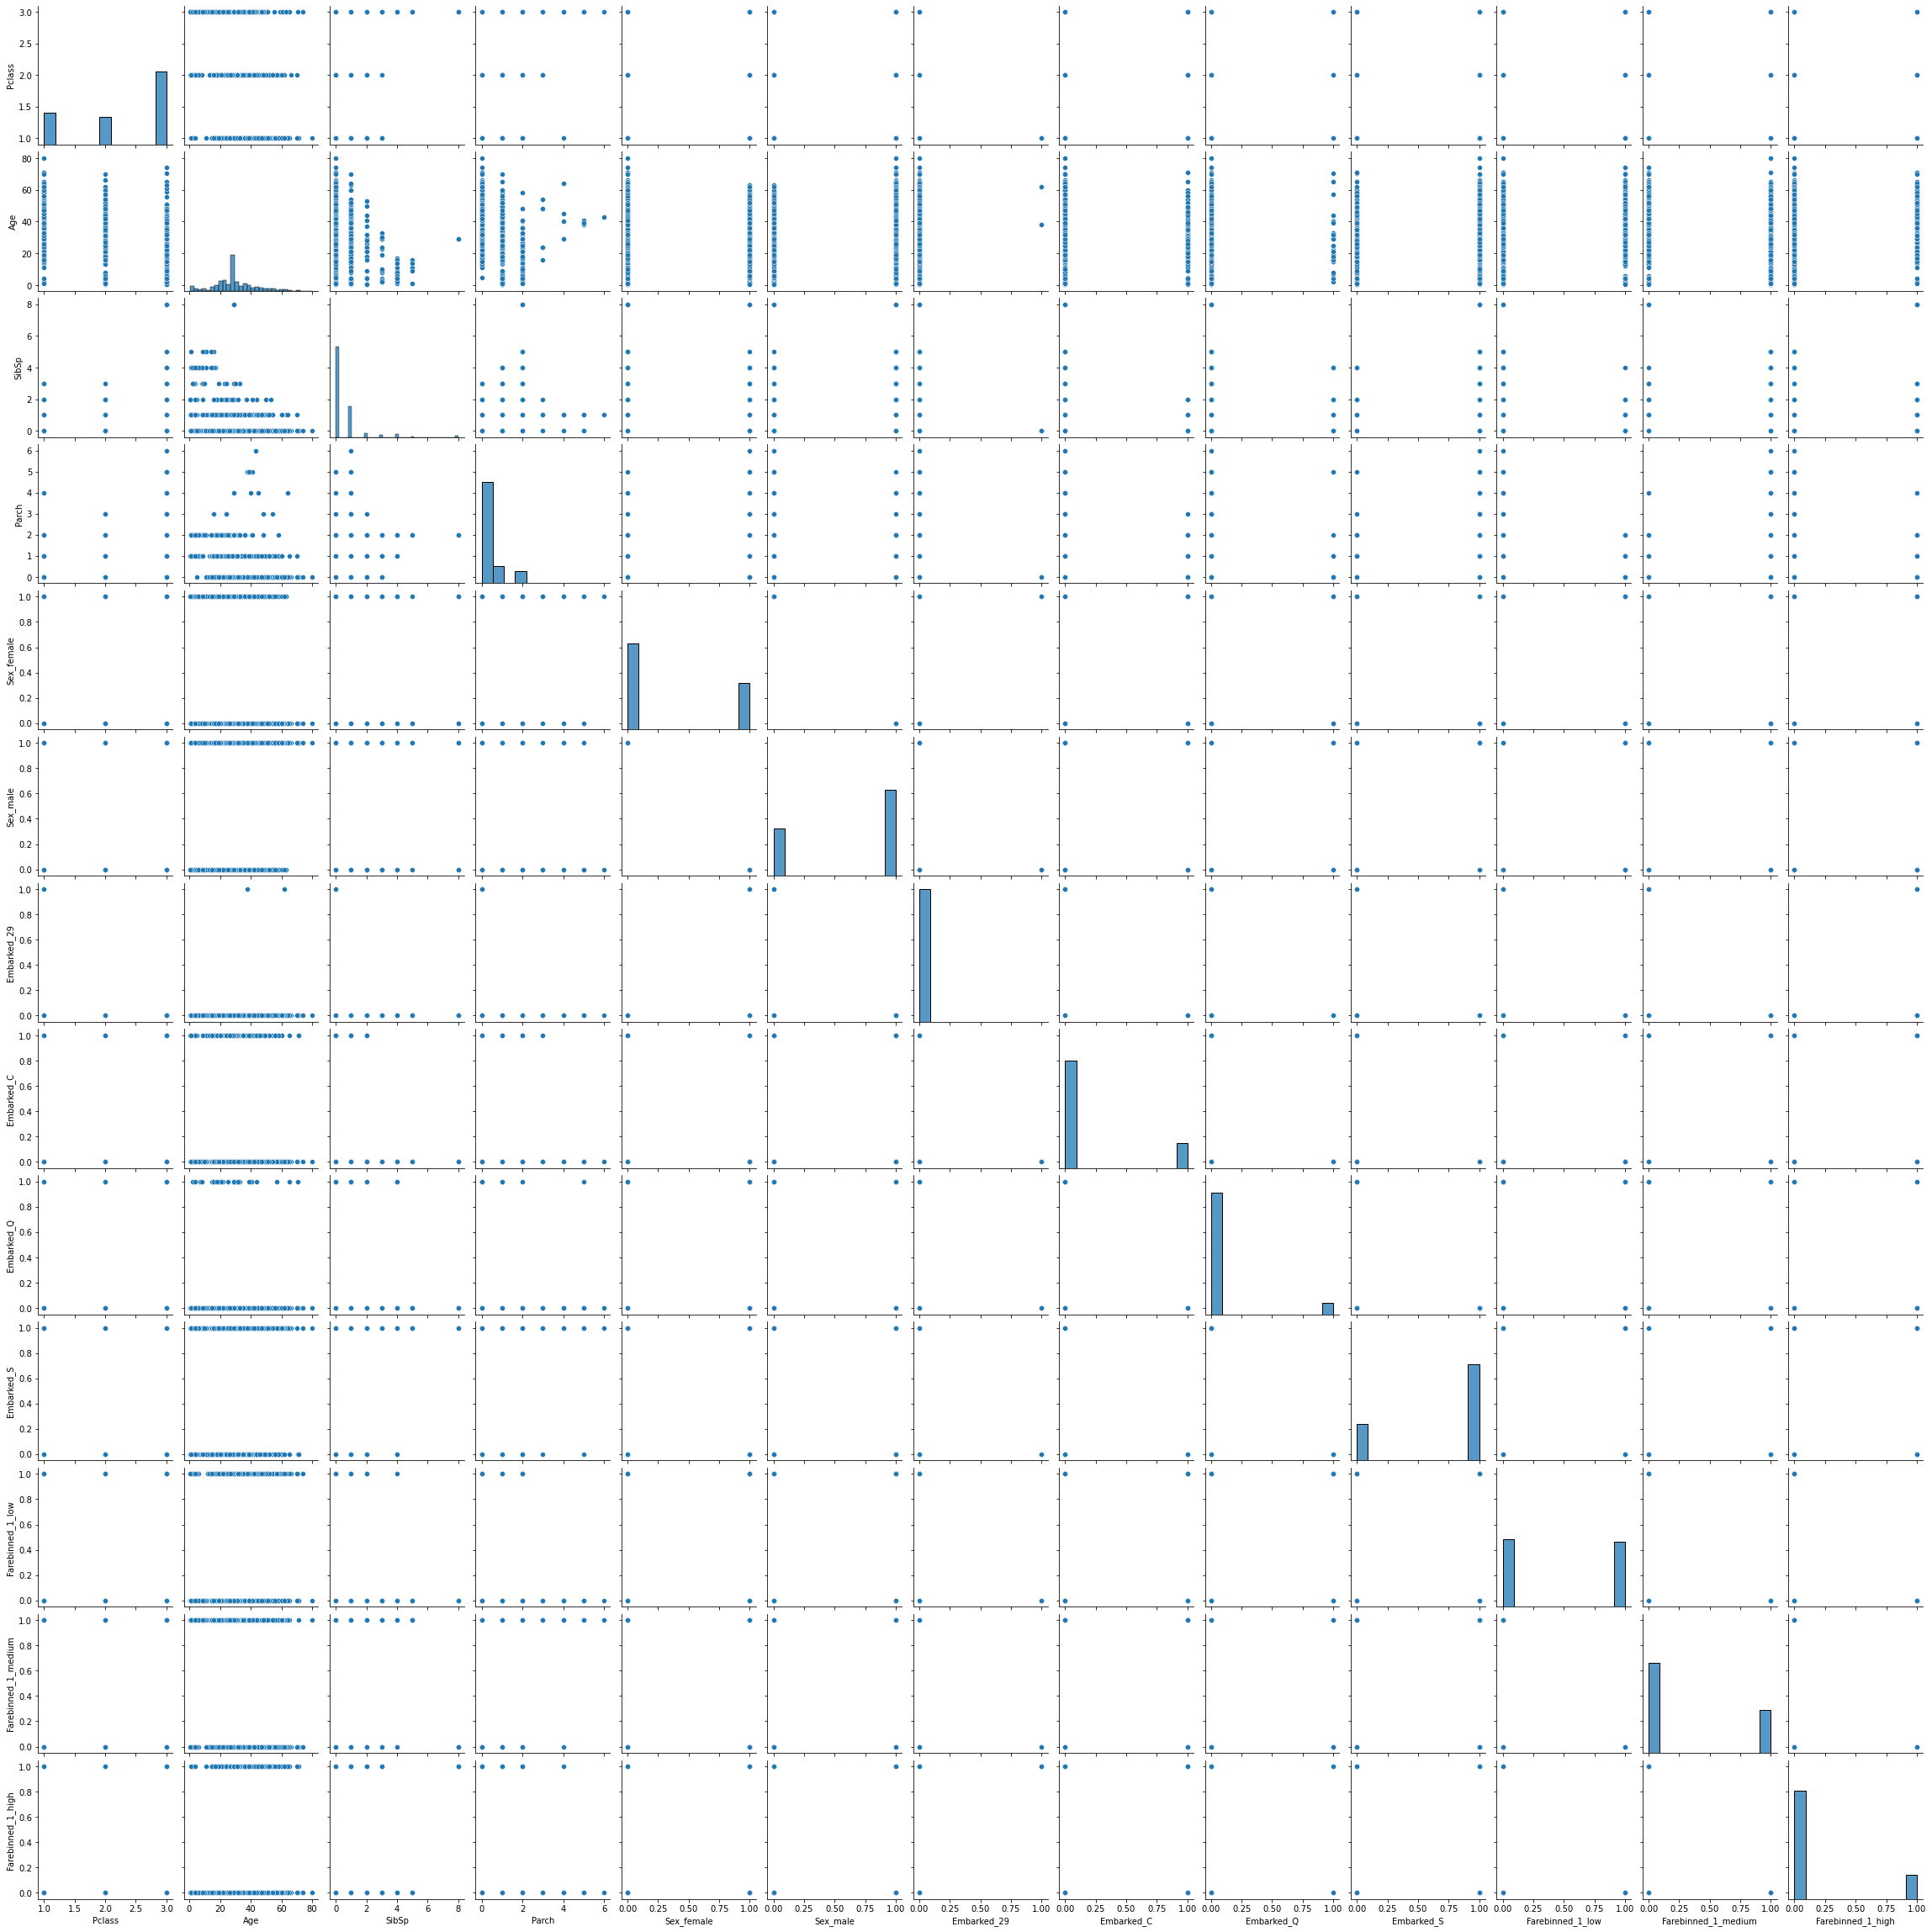

In [47]:
sns.pairplot(X)
plt.show()

In [48]:
y = df['Survived']

In [49]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## FEATURE SCALING
    a) Normalization : helps us to scale down the features between 0-1
Min_Max scaler :
𝑋𝑛𝑜𝑟𝑚=𝑋−𝑋𝑚𝑖𝑛𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛
 
    b) Standardization(Z-Score Normalization) : helps us to scale down the features based on standard normal distribution with
mean = 0 and standart deviation = 1
    𝑍=𝑥−𝑢𝜎


In [50]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [51]:
lin_model = LinearRegression().fit(Xtrain,Ytrain)
lin_model

LinearRegression()

In [52]:
lin_model.score(Xtrain,Ytrain)

0.37523563527104664

   ## The coefficient is a factor that describes the relationship with an unknown variable.

In [53]:
lin_model.coef_

array([-0.14801656, -0.00598912, -0.04055142, -0.01725301,  0.24499375,
       -0.24499375,  0.03988585, -0.00063621,  0.01261024, -0.05185989,
       -0.35109812, -0.30307796, -0.26754846])

In [54]:
lin_model.intercept_

1.358271873949446

In [55]:
lin_model.score(Xtest,Ytest)

0.45411440068874775

In [56]:
pred = lin_model.predict(Xtest)

In [57]:
pred

array([ 0.60653   ,  0.13450985,  0.67959635,  0.47118908,  0.71292394,
        0.23461348,  0.17044456,  0.1524772 ,  0.2765373 ,  0.56075589,
        0.88251199,  0.35518756,  0.14380971,  0.1716415 ,  0.57059529,
        0.487863  ,  0.58993504,  0.64704365,  0.14648809,  0.24498757,
        0.58257353,  0.86171372,  0.79527163,  0.64704365,  0.9561672 ,
        0.69086024,  0.30720578,  0.09258603,  0.32883521,  0.14380971,
        0.53537073,  0.18101263,  0.09395843,  0.12852074,  0.15846632,
        1.04332558,  0.16985292,  0.08659692,  0.48223816,  0.64704365,
        0.09258603,  0.17044456,  0.14049897,  0.83507887,  0.60481863,
       -0.03318543,  0.09258603,  0.15787468,  0.13119434,  0.09258603,
        0.76053568,  0.08351611,  0.91049354,  1.04001484,  0.34081345,
        0.57658441,  0.1524772 ,  0.88567019,  0.88969527,  0.11055338,
        0.07103834,  0.46019058,  0.13450985,  0.97282857,  0.3298024 ,
        0.34081345,  0.89568439,  0.72631234,  0.29182627,  0.63

In [64]:
Ytest.head(10)

246    0
588    0
472    1
71     0
654    0
418    0
220    1
283    1
733    0
550    1
Name: Survived, dtype: int64

In [65]:
def function_1(pred_l):
    survived_list=[]
    for element in pred_l:
        if element > 0.5:
            survived_list.append(1)
        else:
            element=0
            survived_list.append(0)
    return survived_list

In [59]:
result = function_1(pred)

In [61]:
pred = pred.astype(int)

In [63]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [66]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_29,Embarked_C,Embarked_Q,Embarked_S,Farebinned_1_low,Farebinned_1_medium,Farebinned_1_high
0,0,3,22.0,1,0,0,1,0,0,0,1,1,0,0
1,1,1,38.0,1,0,1,0,0,1,0,0,0,0,1
2,1,3,26.0,0,0,1,0,0,0,0,1,1,0,0
3,1,1,35.0,1,0,1,0,0,0,0,1,0,0,1
4,0,3,35.0,0,0,0,1,0,0,0,1,1,0,0


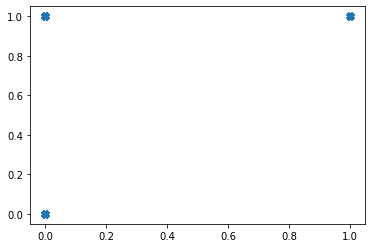

In [67]:
plt.scatter(x=pred,y=Ytest,linewidths=2,marker='X')

In [69]:
model = linear_model.Lasso(alpha=0.1)
model.fit(Xtrain,Ytrain)

Lasso(alpha=0.1)

In [70]:
model.score(Xtrain,Ytrain)

0.1266442775372595

In [71]:
model.score(Xtest,Ytest)

0.13373180987354005

In [72]:
model.coef_

array([-4.79734962e-02, -3.08285592e-03, -0.00000000e+00,  0.00000000e+00,
        7.65096218e-02, -1.54977754e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [73]:
model.intercept_

0.5466017064289023

In [74]:
lpred = model.predict(Xtest)

In [75]:
lpred

array([0.40211944, 0.33485839, 0.42543009, 0.42986514, 0.42369943,
       0.35816904, 0.35335552, 0.34410696, 0.37974903, 0.44621966,
       0.52099862, 0.3876454 , 0.3132784 , 0.3396719 , 0.38362231,
       0.40922539, 0.41445087, 0.38978802, 0.3410241 , 0.310574  ,
       0.38978802, 0.45490645, 0.44084437, 0.38978802, 0.48265215,
       0.42234723, 0.38978802, 0.3132784 , 0.35373398, 0.3132784 ,
       0.4153911 , 0.32560982, 0.33485839, 0.33177553, 0.34718981,
       0.50114929, 0.35643838, 0.31019554, 0.33429661, 0.38978802,
       0.3132784 , 0.35335552, 0.33794124, 0.41482932, 0.37302154,
       0.24853842, 0.3132784 , 0.35027267, 0.25199974, 0.3132784 ,
       0.45317579, 0.32252696, 0.51791577, 0.52581214, 0.35989969,
       0.38670516, 0.34410696, 0.46723787, 0.4518236 , 0.32252696,
       0.39959836, 0.40305968, 0.33485839, 0.48573501, 0.35681684,
       0.35989969, 0.45490645, 0.46377656, 0.36125189, 0.42369943,
       0.38978802, 0.52581214, 0.37185266, 0.34275476, 0.34718

In [76]:
model.score(Xtest,lpred)

1.0

In [77]:
r = r2_score(Ytest,lpred)

In [78]:
r

0.13373180987354005

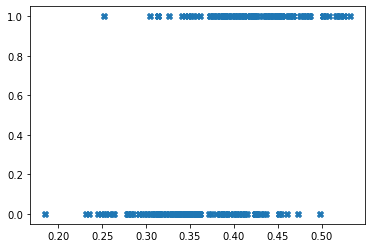

In [79]:
plt.scatter(x=lpred,y=Ytest,marker='X')

In [82]:
Input = [('Scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode',LinearRegression())]

In [83]:
pipe =Pipeline(Input)

In [89]:
pipe.fit(Xtrain,Ytrain)

Pipeline(steps=[('Scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [91]:
yhat = pipe.predict(Xtest)

In [92]:
yhat

array([ 4.97061253e-01,  1.19886637e-01,  7.19513655e-01, -1.54237747e-02,
        8.09835434e-01,  1.12094641e-01,  1.51577234e-01,  1.34665728e-01,
        1.54114485e-01,  5.96575499e-01,  1.08454728e+00,  2.17671633e-01,
        2.04943419e-01,  2.83244610e-01,  4.98057127e-01,  4.54947472e-01,
        4.77852345e-01,  8.06129456e-01,  1.29502535e-01,  2.65542507e-01,
        4.96777058e-01,  1.03254580e+00,  7.72931337e-01,  8.06129456e-01,
        9.72361803e-01,  7.16300964e-01, -4.68134880e-02,  9.36958790e-02,
        3.69093180e-01,  2.04943419e-01,  1.99692011e-01,  7.67638683e-02,
        1.35999918e-01,  1.15434408e-01,  1.40065908e-01,  9.16885138e-01,
        7.80467749e-01,  9.09020901e-02,  3.16890240e-01,  8.06129456e-01,
        9.36958790e-02,  1.51577234e-01,  1.24576092e-01,  1.10505462e+00,
        7.36220121e-01,  8.47907066e-02,  9.36958790e-02,  7.53507853e-01,
        1.99297667e-01,  9.36958790e-02,  7.41412878e-01,  2.04714537e-01,
        1.54869795e+00,  

In [90]:
pipe.score(Xtrain,Ytrain)

0.47207960713539077

In [93]:
pipe.score(Xtest,yhat)

1.0